# Lista 08

## Nome: Jorge Lucas Colares Martins
## Matricula: 402119


## Importando bibliotecas

In [374]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

## Questão 01

### Criando dataframe

In [375]:
data = load_boston()

df = pd.DataFrame(data = data.data, columns=data.feature_names)

df.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
258,0.66351,20.0,3.97,0.0,0.647,7.333,100.0,1.8946,5.0,264.0,13.0,383.29,7.79
459,6.80117,0.0,18.10,0.0,0.713,6.081,84.4,2.7175,24.0,666.0,20.2,396.90,14.70
157,1.22358,0.0,19.58,0.0,0.605,6.943,97.4,1.8773,5.0,403.0,14.7,363.43,4.59
316,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96
29,1.00245,0.0,8.14,0.0,0.538,6.674,87.3,4.2390,4.0,307.0,21.0,380.23,11.98
448,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
41,0.12744,0.0,6.91,0.0,0.448,6.770,2.9,5.7209,3.0,233.0,17.9,385.41,4.84
256,0.01538,90.0,3.75,0.0,0.394,7.454,34.2,6.3361,3.0,244.0,15.9,386.34,3.11


### Sepaparando em treino e teste

In [376]:
X, y = load_boston(return_X_y=True)

result_list = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

### Item a)

In [377]:
print('Alpha: 0.1, Normalize: False')
lasso = Lasso(alpha=0.1, normalize=False)
lasso.fit(X_train, y_train)
lasso.predict(X_test)
print("Coeficientes: ",*lasso.coef_ ,sep = "\n")

result = {'Alpha': 0.1, 'Normalize': False}
for i, value in zip(df.columns, lasso.coef_):
    result[i] = value

result_list.append(result)

Alpha: 0.1, Normalize: False
Coeficientes: 
-0.12285442236904869
0.038638584896334385
-0.0004971883845239215
1.4835375939521476
-0.0
3.8936742074757085
-0.019604817948392594
-1.1056139701534526
0.21667347897121828
-0.01058440036605593
-0.7440145159976705
0.012395905914001139
-0.6022816365659217


In [378]:

print('\n Alpha: 0.1, Normalize: True')
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso.predict(X_test)
print("Coeficientes: ",*lasso.coef_ ,sep = "\n")

result = {'Alpha': 0.1, 'Normalize': True}
for i, value in zip(df.columns, lasso.coef_):
    result[i] = value

result_list.append(result)


 Alpha: 0.1, Normalize: True
Coeficientes: 
-0.0
0.0
-0.0
0.0
-0.0
3.188528939402271
-0.0
-0.0
-0.0
-0.0
-0.3066900998405716
0.0
-0.4866647584743145


### Item b)

In [379]:
print('Alpha: 0.4, Normalize: False')
lasso = Lasso(alpha=0.4, normalize=False)
lasso.fit(X_train, y_train)
lasso.predict(X_test)
print("Coeficientes: ",*lasso.coef_ ,sep = "\n")

result = {'Alpha': 0.4, 'Normalize': False}
for i, value in zip(df.columns, lasso.coef_):
    result[i] = value

result_list.append(result)

Alpha: 0.4, Normalize: False
Coeficientes: 
-0.11576163023052455
0.03826390061301022
-0.0
0.0
-0.0
3.029047873677166
-0.005942926032743746
-0.9459188293241345
0.2183236834627618
-0.01054259508525185
-0.7399564658184024
0.01213879190729223
-0.6698095192443357


In [380]:
print('\n Alpha: 0.4, Normalize: True')
lasso = Lasso(alpha=0.4, normalize=True)
lasso.fit(X_train, y_train)
lasso.predict(X_test)
print("Coeficientes: ",*lasso.coef_ ,sep = "\n")

result = {'Alpha': 0.4, 'Normalize': True}
for i, value in zip(df.columns, lasso.coef_):
    result[i] = value

result_list.append(result)


 Alpha: 0.4, Normalize: True
Coeficientes: 
-0.0
0.0
-0.0
0.0
-0.0
0.0
-0.0
0.0
-0.0
-0.0
-0.0
0.0
-0.0


### Item c)

Sim, foram zeradas, como mostra no dataframe abaixo

In [381]:
df_result = pd.DataFrame(result_list)
df_result

,Alpha,Normalize,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.1,False,-0.122854,0.038639,-0.000497,1.483538,-0.0,3.893674,-0.019605,-1.105614,0.216673,-0.010584,-0.744015,0.012396,-0.602282
1,0.1,True,-0.000000,0.000000,-0.000000,0.000000,-0.0,3.188529,-0.000000,-0.000000,-0.000000,-0.000000,-0.306690,0.000000,-0.486665
2,0.4,False,-0.115762,0.038264,-0.000000,0.000000,-0.0,3.029048,-0.005943,-0.945919,0.218324,-0.010543,-0.739956,0.012139,-0.669810
3,0.4,True,-0.000000,0.000000,-0.000000,0.000000,-0.0,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000


## Questão 02

In [382]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

result_list = []


### Item a)

In [383]:
valores_alpha = np.logspace(-4, 0, 5)
scr_list = []

for i in valores_alpha:
    ridge = Ridge(alpha=i, normalize=True)
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)
    scr = ridge.score(X_test, y_test)

    scr_list.append(scr)
    result = {'Alpha': i, 'Normalize': True, 'R² Score': scr}
    result_list.append(result)





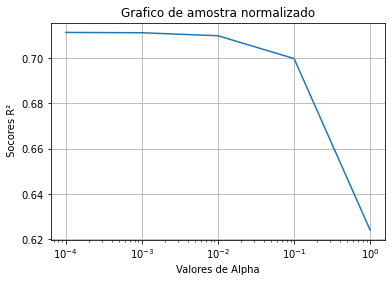

In [384]:
plt.plot(valores_alpha, scr_list)
plt.title('Grafico de amostra normalizado')
plt.ylabel(' Socores R²')
plt.xlabel('Valores de Alpha')
plt.xscale('log')
plt.grid(True)
plt.show()

### Item b)


In [385]:
valores_alpha = np.logspace(-4, 0, 5)
scr_list = []

for i in valores_alpha:
    ridge = Ridge(alpha=i, normalize=False)
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)
    scr = ridge.score(X_test, y_test)

    scr_list.append(scr)
    result = {'Alpha': i, 'Normalize': False, 'R² Score': scr}
    result_list.append(result)

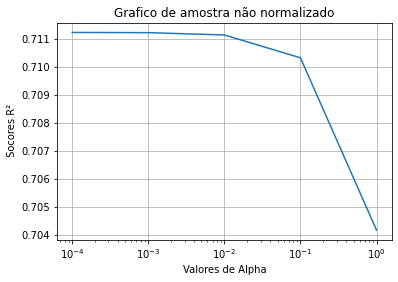

In [386]:
plt.plot(valores_alpha, scr_list)
plt.title('Grafico de amostra não normalizado')
plt.ylabel(' Socores R²')
plt.xlabel('Valores de Alpha')
plt.grid(True)
plt.xscale('log')
plt.show()

### Item c)

In [387]:
df_result = pd.DataFrame(result_list)
df_result = df_result.sort_values('R² Score', ascending = False)
df_result

,Alpha,Normalize,R² Score
5,0.0001,False,0.711225
6,0.0010,False,0.711217
0,0.0001,True,0.711211
7,0.0100,False,0.711135
1,0.0010,True,0.711078
8,0.1000,False,0.710318
2,0.0100,True,0.709759
9,1.0000,False,0.704159
3,0.1000,True,0.699694
4,1.0000,True,0.624106


In [388]:
ridge = Ridge(alpha=df_result.loc[df_result.index[0],'Alpha'], normalize=df_result.loc[df_result.index[0],'Normalize'], max_iter=10)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
scr = ridge.score(X_test, y_test)

print('R² Score:',scr)


R² Score: 0.7112250981524475


## Questão 03

### Importando dataframe

In [389]:
df = pd.read_csv("diabetes.csv",delimiter=',')
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
140,3,128,78,0,0,21.1,0.268,55,0
642,6,147,80,0,0,29.5,0.178,50,1
215,12,151,70,40,271,41.8,0.742,38,1
744,13,153,88,37,140,40.6,1.174,39,0
337,5,115,76,0,0,31.2,0.343,44,1
599,1,109,38,18,120,23.1,0.407,26,0
367,0,101,64,17,0,21.0,0.252,21,0
347,3,116,0,0,0,23.5,0.187,23,0
182,1,0,74,20,23,27.7,0.299,21,0
528,0,117,66,31,188,30.8,0.493,22,0


In [390]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome',axis=1), df['Outcome'], test_size=0.2, random_state= 42, stratify=df['Outcome'])

In [391]:
none_logreg = LogisticRegression(penalty='none')
l1_logreg = LogisticRegression(penalty = 'l1', solver='liblinear')
l2_logreg = LogisticRegression(penalty = 'l2')
elasticnet_logreg = LogisticRegression(penalty = 'elasticnet', solver='saga', l1_ratio = 0.1)

In [392]:
none_logreg.fit(X_train,y_train)
l1_logreg.fit(X_train,y_train)
l2_logreg.fit(X_train,y_train)
elasticnet_logreg.fit(X_train,y_train)

y_pred_none = none_logreg.predict(X_test)
y_pred_l1 = none_logreg.predict(X_test)
y_pred_l2 = none_logreg.predict(X_test)
y_pred_elasticnet = none_logreg.predict(X_test)

### Item 1)

In [393]:
print("Coeficientes L1: ",*l1_logreg.coef_ ,sep = "\n")

Coeficientes L1: 
[ 0.11045686  0.03505435 -0.01206605  0.00422554 -0.00105456  0.08459662
  0.63073806  0.01381764]


Nenhuma feature foi descartada usando o L1

### Item 2)

Coeficientes L2: 
[ 0.1166826   0.03753065 -0.01051682  0.00471297 -0.00134088  0.09037643
  0.85556088  0.01426081]
Coeficientes None: 
[ 0.11725554  0.03684592 -0.01115495  0.00479288 -0.00129745  0.09197824
  0.81372774  0.01545635]


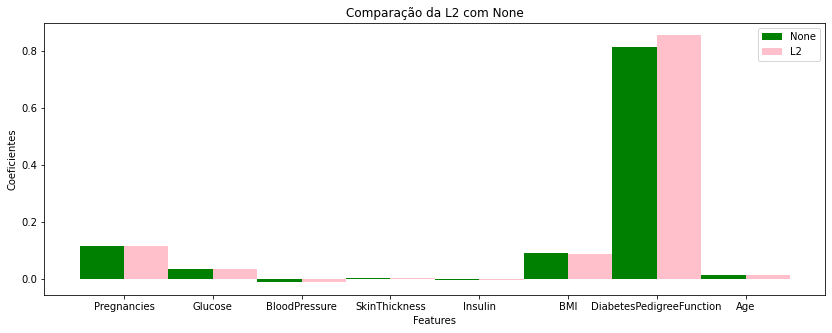

In [394]:
print("Coeficientes L2: ",*l2_logreg.coef_ ,sep = "\n")
print("Coeficientes None: ",*none_logreg.coef_ ,sep = "\n")

plt.figure(figsize = (14, 5))

barWidth = 0.5

p1 = np.arange(len(none_logreg.coef_[0]))
p2 = [p + barWidth for p in p1]


plt.bar(p1, none_logreg.coef_[0], color='green', width=barWidth, label='None')
plt.bar(p2, l2_logreg.coef_[0], color='pink', width=barWidth, label='L2')
plt.legend()
plt.xlabel('Features')
plt.ylabel('Coeficientes')
plt.title('Comparação da L2 com None')
plt.xticks((p1+p2)/2, df.columns[:-1])
plt.show()


### Item 3)

In [396]:
valores_alpha = np.logspace(-8, 8, 10)
print(valores_alpha)
result_list = []

none_list = []
l1_list = []
l2_list = []
elasticnet_list = []

for i in valores_alpha:
    none_logreg = LogisticRegression(C=1/i, penalty='none')
    l1_logreg = LogisticRegression(C=1/i, penalty = 'l1', solver='liblinear')
    l2_logreg = LogisticRegression(C= 1/i, penalty = 'l2')
    elasticnet_logreg = LogisticRegression(C= 1/i, penalty = 'elasticnet', solver='saga', l1_ratio = 0.1)

    none_logreg.fit(X_train,y_train)
    l1_logreg.fit(X_train,y_train)
    l2_logreg.fit(X_train,y_train)
    elasticnet_logreg.fit(X_train,y_train)

    y_pred_none = none_logreg.predict(X_test)
    y_pred_l1 = none_logreg.predict(X_test)
    y_pred_l2 = none_logreg.predict(X_test)
    y_pred_elasticnet = none_logreg.predict(X_test)

    acr_none = metrics.accuracy_score(y_test, y_pred_none)
    acr_l1 = metrics.accuracy_score(y_test, y_pred_l1)
    acr_l2 = metrics.accuracy_score(y_test ,y_pred_l2)
    acr_elasticnet = metrics.accuracy_score(y_test, y_pred_elasticnet)


    result = {'Regularização': 'none' , 'Alpha': i, 'Accuracy': acr_none}
    result_list.append(result)

    result = {'Regularização': 'L1' , 'Alpha': i, 'Accuracy': acr_l1}
    result_list.append(result)

    result = {'Regularização': 'L2' , 'Alpha': i, 'Accuracy': acr_l2}
    result_list.append(result)

    result = {'Regularização': 'Elasticnet' , 'Alpha': i, 'Accuracy': acr_elasticnet}
    result_list.append(result)


    
df_result = pd.DataFrame(result_list)
df_result.sort_values('Regularização')

[1.00000000e-08 5.99484250e-07 3.59381366e-05 2.15443469e-03
 1.29154967e-01 7.74263683e+00 4.64158883e+02 2.78255940e+04
 1.66810054e+06 1.00000000e+08]


,Regularização,Alpha,Accuracy
3,Elasticnet,"[1e-08, 5.994842503189409e-07, 3.5938136638046...","[0.7142857142857143, 0.7142857142857143, 0.714..."
1,L1,"[1e-08, 5.994842503189409e-07, 3.5938136638046...","[0.7142857142857143, 0.7142857142857143, 0.714..."
2,L2,"[1e-08, 5.994842503189409e-07, 3.5938136638046...","[0.7142857142857143, 0.7142857142857143, 0.714..."
0,none,"[1e-08, 5.994842503189409e-07, 3.5938136638046...","[0.7142857142857143, 0.7142857142857143, 0.714..."
